# Mise en place de l'environnement

In [1]:
pip install numpy

In [2]:
pip install pandas

In [3]:
pip install matplotlib

In [4]:
pip install seaborn

In [5]:
pip install missingno

In [5]:
pip install scipy.stats

In [5]:
pip install sklearn.experimental

In [5]:
pip install sklearn.impute

In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)

Documents téléchargeable via le lien suivant :
    https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip

In [8]:
Food = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t',on_bad_lines='skip', low_memory=False)

# Phase d’exploration
#### Comprendre la forme et la qualité des données à disposition
#### Nous commençons par se donner une première impression du jeu de données

In [9]:
Food.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [10]:
Food.shape

(320772, 162)

In [11]:
Food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [12]:
Food.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [13]:
print((Food.isnull().mean()).sort_values(ascending=[False]))

water-hardness_100g                           1.000000
no_nutriments                                 1.000000
ingredients_that_may_be_from_palm_oil         1.000000
nutrition_grade_uk                            1.000000
nervonic-acid_100g                            1.000000
erucic-acid_100g                              1.000000
mead-acid_100g                                1.000000
elaidic-acid_100g                             1.000000
butyric-acid_100g                             1.000000
caproic-acid_100g                             1.000000
ingredients_from_palm_oil                     1.000000
lignoceric-acid_100g                          1.000000
cerotic-acid_100g                             1.000000
melissic-acid_100g                            1.000000
chlorophyl_100g                               1.000000
glycemic-index_100g                           1.000000
myristic-acid_100g                            0.999997
palmitic-acid_100g                            0.999997
caprylic-a

In [14]:
Food.duplicated(keep=False).sum()

0

In [15]:
Food.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

<AxesSubplot:>

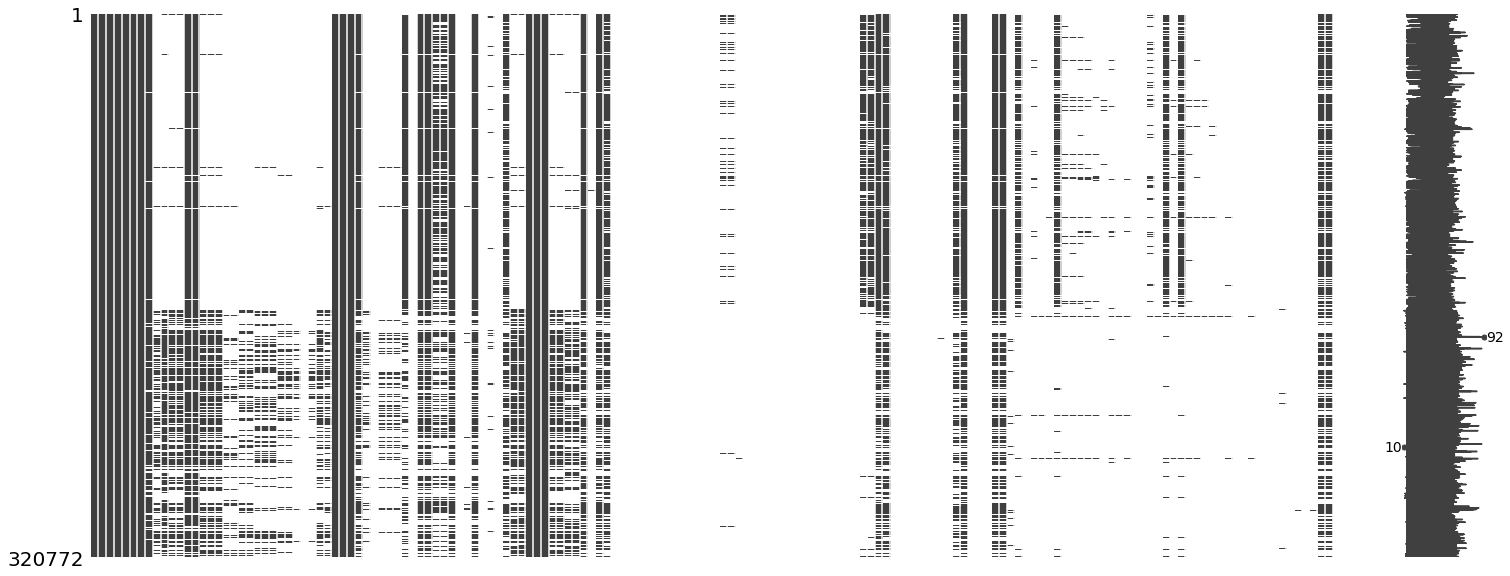

In [16]:
msno.matrix(Food[Food.columns[0:]])

<AxesSubplot:>

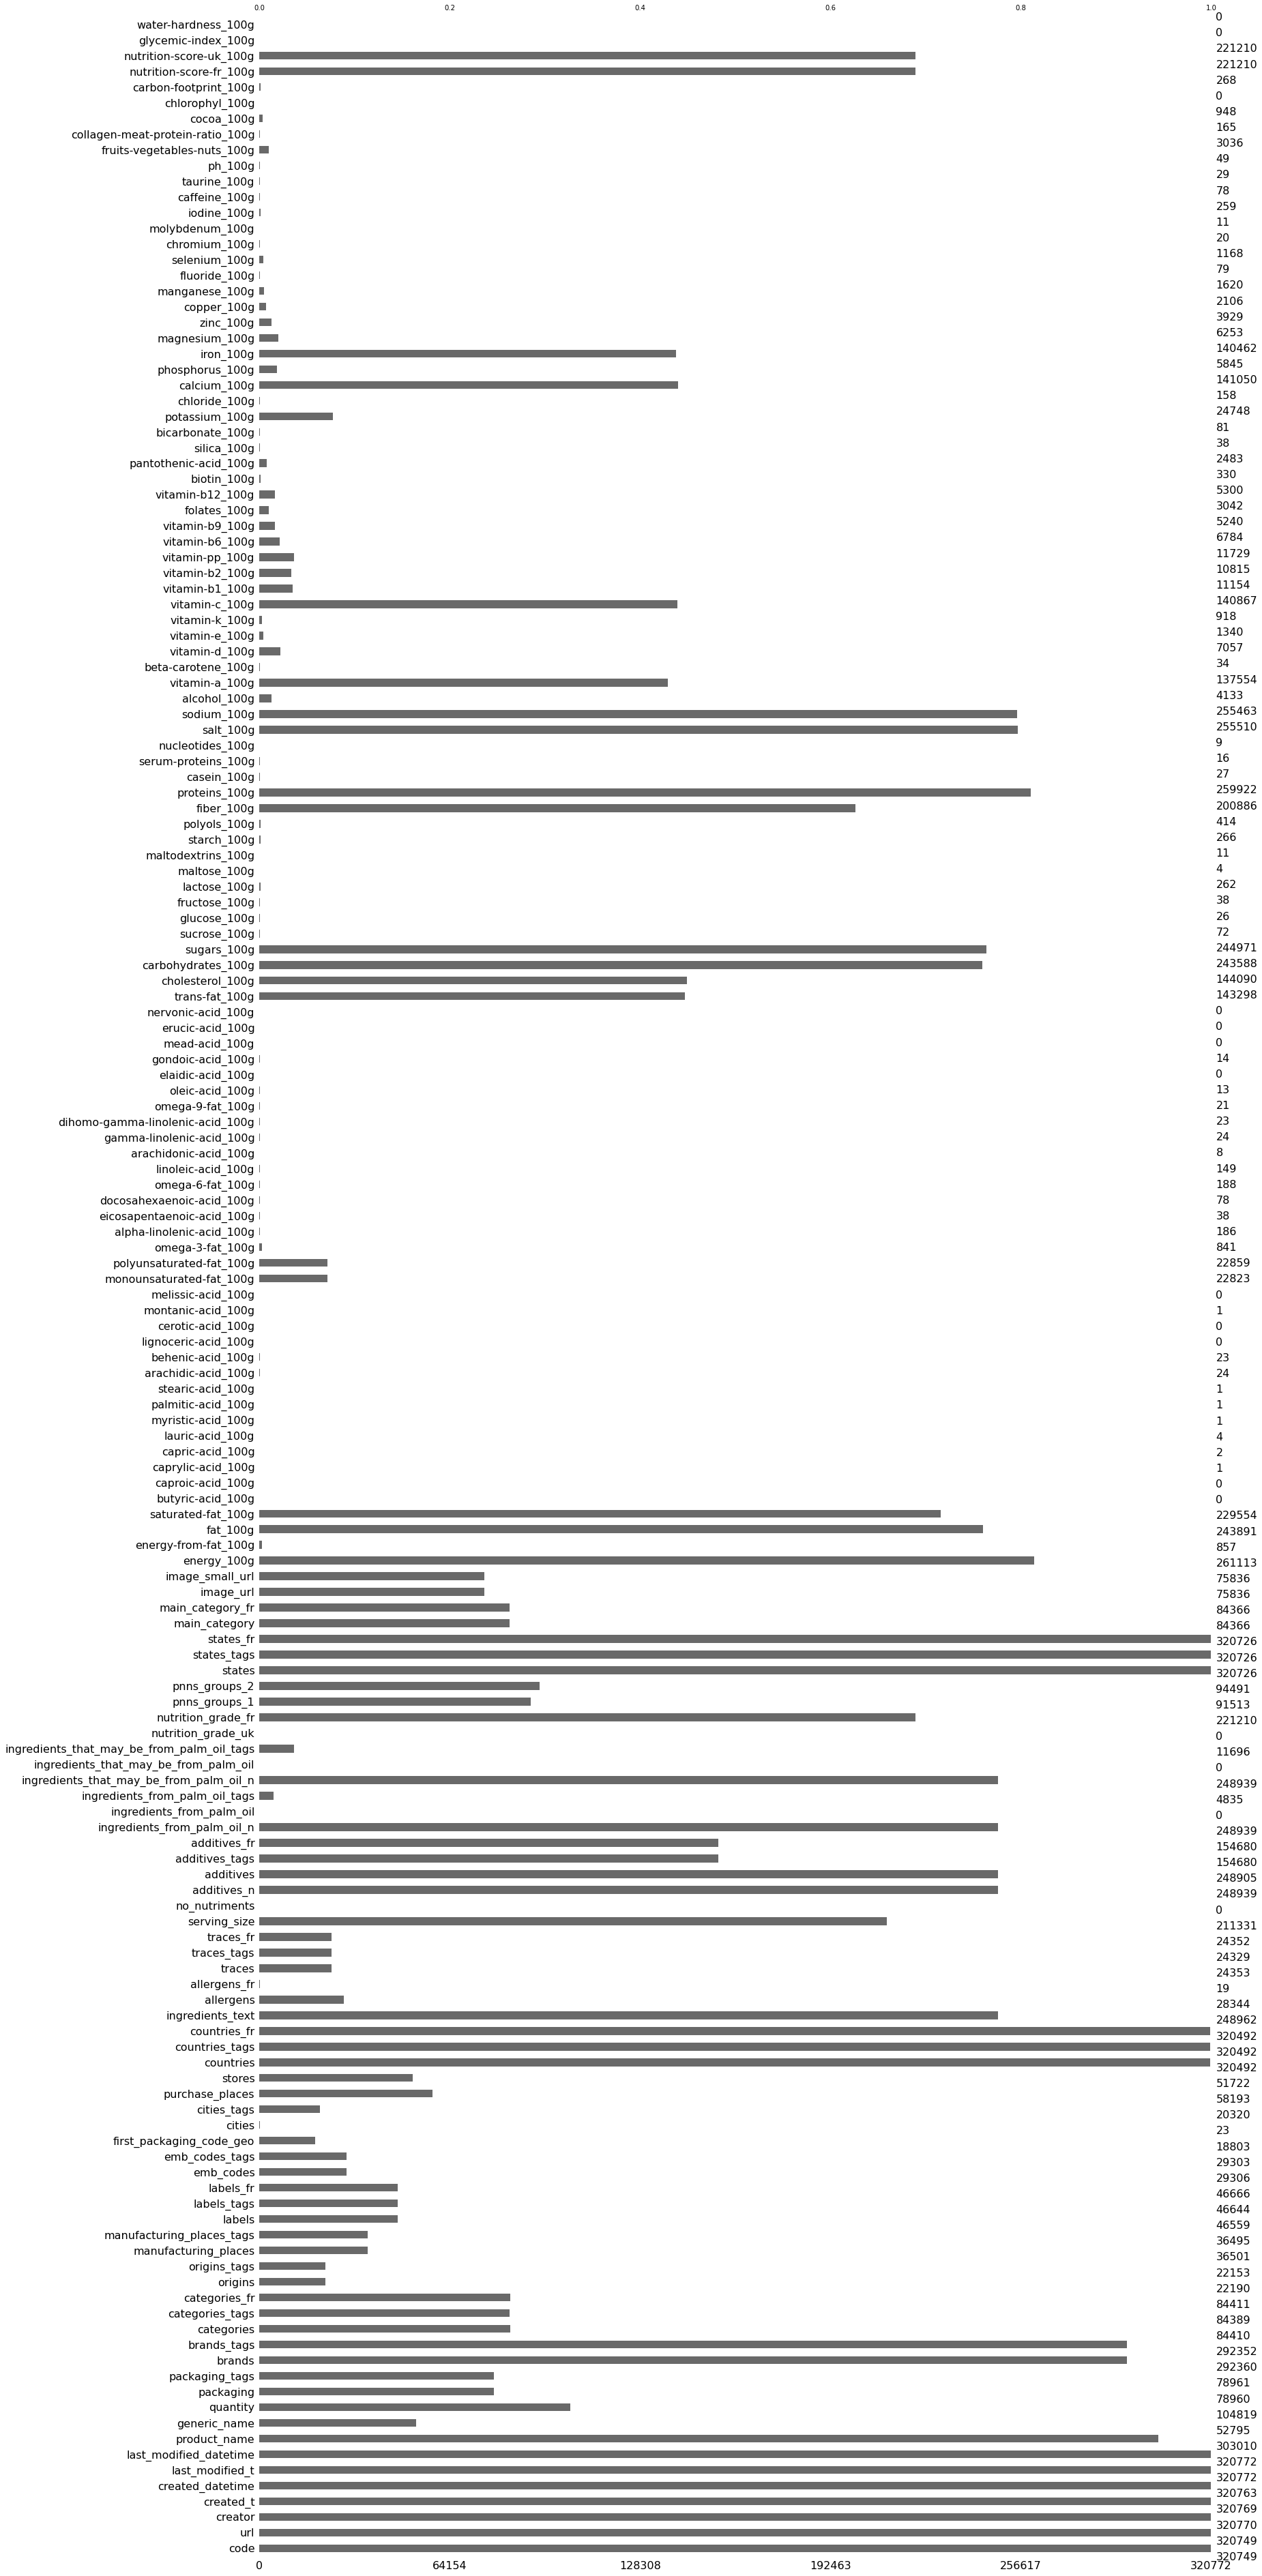

In [17]:
msno.bar(Food)

Objectif de détecter et corriger :\
-valeurs manquantes\
-erreur lexicale\
-erreur d'irrégularité\
-erreur de formatage\
-doublon\
-erreur de contradiction\
-outlier (aberrant ou atypique)

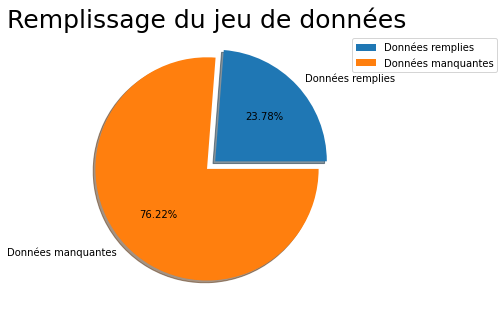

In [18]:
def taux_remplissage(Food):
    nb_rows, nb_columns = Food.shape # Définition ligne et colonnes du dataframe Food
    nb_data = Food.count().sum()# Comptage du nombre de non-NaN (.count ne compte pas les NaN)
    taux_remplissage = nb_data / (nb_rows * nb_columns)# calcul du taux de remplissage
    labels = ["Données remplies", "Données manquantes"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Remplissage du jeu de données", fontsize=25)
    ax.axis("equal")
     
    ax.pie([taux_remplissage, 1 - taux_remplissage],
           labels = labels,
           explode = (0.1, 0),
           autopct='%1.2f%%',
           shadow=True)
    plt.legend(labels,bbox_to_anchor=(1, 1), loc=2)

taux_remplissage(Food)

Nous constatons beaucoup de données manquantes. Nous allons commencer à nettoyer le dataset.

In [19]:
Food.dtypes.value_counts()

float64    106
object      56
dtype: int64

Text(0.5, 1.0, 'Type de données')

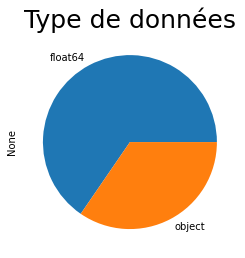

In [20]:
Food.dtypes.value_counts().plot.pie()
plt.title("Type de données", fontsize=25)

Analyse de Forme :\
variable target : product_name\
lignes et colonnes : 320772, 162\
types de variables : qualitatives : 56, quantitatives : 106\
Analyse des valeurs manquantes :
beaucoup de NaN (77,22% de NaN)


Nous retirons les colonnes ayant moins de 50% de remplissage sans utiliser une fonction car sinon dès l'ajout \
d'une nouvelle entrée, elle serait retiré instantanément.

In [21]:
Food = Food[Food.columns[Food.isna().sum()/Food.shape[0]<0.5]]

In [22]:
#Exemple de fonction possible pour retirer les nans
#def Nan_Out (dataframe):
    #dataframe = dataframe[dataframe.columns[dataframe.isna().sum()/dataframe.shape[0]<0.5]]
    #return dataframe

Nous nous concentrons sur la France exclusivement.

In [23]:
Food = Food.loc[Food["countries_fr"]== "France"]

Nous amputons les produits n'ayant pas de nom

In [24]:
Food = Food.loc[~Food["product_name"].isna()]

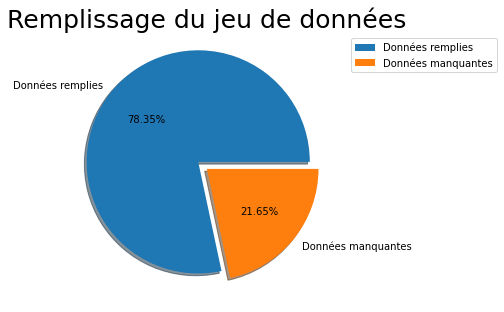

In [25]:
taux_remplissage(Food)

L'objectif de notre application est de proposer, pour la France, un produit similaire avec un meilleur Nutri-score
pour rappel :https://fr.wikipedia.org/wiki/Nutri-score

Nous écartons les variables n'ayant pas d'intérêts pour notre étude

In [26]:
Food = Food.drop(columns=["created_datetime",
                        "states_fr",
                        "created_t",
                        "creator",
                        "last_modified_datetime",
                        "ingredients_from_palm_oil_n",
                        "ingredients_that_may_be_from_palm_oil_n",
                        "last_modified_t",
                        "countries",
                        "countries_tags",
                        "serving_size",
                        "states",
                        "states_tags",
                        "brands_tags",
                        "nutrition-score-uk_100g"])

In [27]:
print((Food.isnull().mean()).sort_values(ascending=[False]))

fiber_100g                 0.502758
carbohydrates_100g         0.497906
fat_100g                   0.493169
additives                  0.422996
ingredients_text           0.422870
additives_n                0.422870
nutrition-score-fr_100g    0.334035
nutrition_grade_fr         0.334035
saturated-fat_100g         0.323909
sugars_100g                0.322879
sodium_100g                0.322238
salt_100g                  0.322204
proteins_100g              0.303542
energy_100g                0.300693
brands                     0.065528
url                        0.000000
countries_fr               0.000000
product_name               0.000000
code                       0.000000
dtype: float64


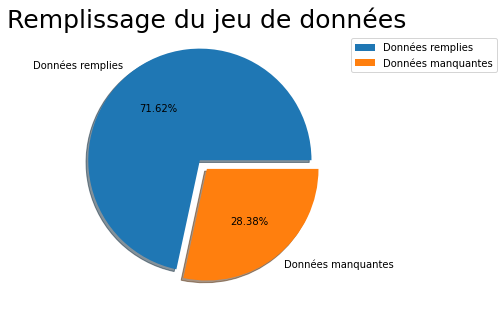

In [28]:
taux_remplissage(Food)

In [29]:
Food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87398 entries, 0 to 320770
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     87398 non-null  object 
 1   url                      87398 non-null  object 
 2   product_name             87398 non-null  object 
 3   brands                   81671 non-null  object 
 4   countries_fr             87398 non-null  object 
 5   ingredients_text         50440 non-null  object 
 6   additives_n              50440 non-null  float64
 7   additives                50429 non-null  object 
 8   nutrition_grade_fr       58204 non-null  object 
 9   energy_100g              61118 non-null  float64
 10  fat_100g                 44296 non-null  float64
 11  saturated-fat_100g       59089 non-null  float64
 12  carbohydrates_100g       43882 non-null  float64
 13  sugars_100g              59179 non-null  float64
 14  fiber_100g           

1ère action : 
- suppression des variables ayant un taux de remplissage > à 50%
- suppression des doublons par code produits
- Focus sur PROGRAMME NATIONAL NUTRITION SANTÉ ou nutriscore ?

2 étape : amputation des valeurs abérantes < à 100g 


Nous remarquons que la colonne code contient des doublons.
Nous retirons les doublons pour garder la première occurence.

In [30]:
Food.drop_duplicates(subset ="code", keep = 'first', inplace=True)

In [31]:
Food["code"].duplicated().sum()

0

Text(0.5, 1.0, 'Ensemble des données quantitatives')

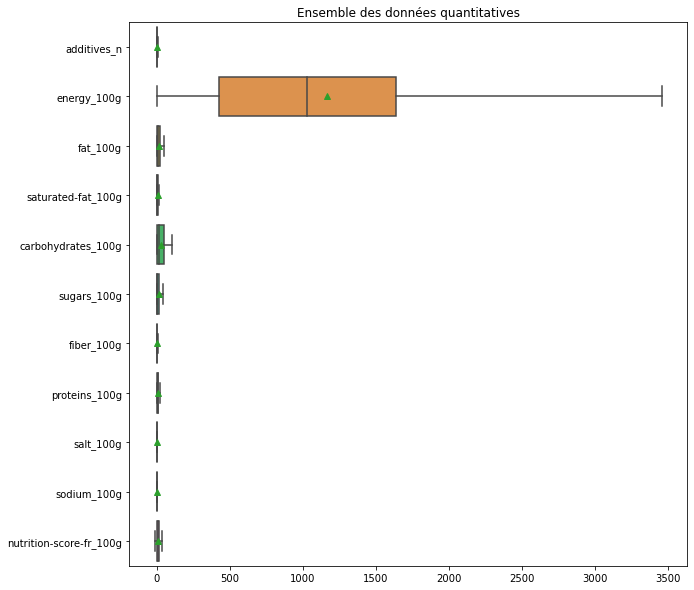

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
sns.boxplot(data=Food, orient='h', showfliers=False, showmeans=True).set_title('Ensemble des données quantitatives')

On observe qu''energy_100g' est exprimée en kilojoules (kJ) donc la base de 100g maximum n'est pas cohérente pour cette feature. Une recherche internet nous apprend que la valeur maximum est 3500kJ.\
Je souhaite faire une fonction qui traite les valeurs abérrantes sur des colonnes défini. \
Il faut que le check soit fait sur >3500 pour energy et pour les autres (excluant nutriscore) >100g et <0g.\
Pour toutes les valeurs détectées il faut remplacer les valeurs par None afin de pouvoir les retraiter ensuite.\

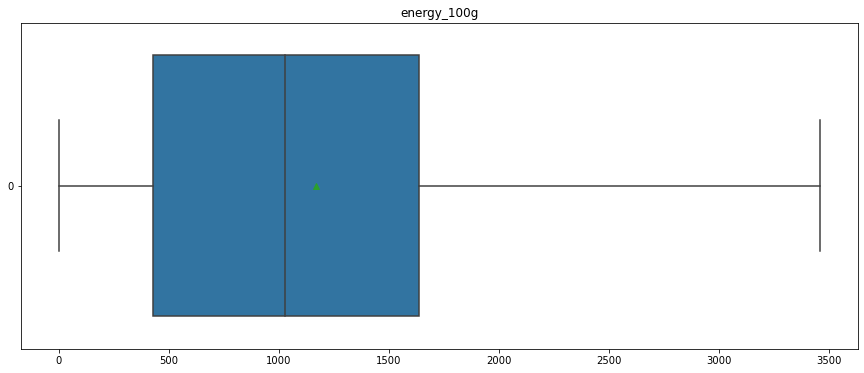

In [33]:
fig = plt.figure(figsize=(15, 6))
ax = plt.axes()
sns.boxplot(data=Food['energy_100g'], orient='h', showfliers=False, showmeans=True).set_title('energy_100g');

In [34]:
def object_to_string(Df):
    """ Convertit les colonnes de types objets en type string
    input : le Df à convertir
    return le Df convertit
    """
    ColDf = Df.columns[Df.dtypes=='object']
    Df[ColDf]= Df[ColDf].astype('string')
    return Df

In [35]:
object_to_string(Food)

,code,url,product_name,brands,countries_fr,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,Ferme t'y R'nao,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,<NA>,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,<NA>,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,Bertrand Lejeune,France,lentilles vertes,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,0000007730009,http://world-fr.openfoodfacts.org/produit/0000...,Biscuits sablés fourrage au cacao,St Michel,France,"Sucre, farine de _Blé_, graisse et huiles végé...",3.0,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),Roussette du Bugey,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.0254,0.01,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",<NA>,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,"Sans marque,D.Lambert",France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
def verif_outliers_energy():
    #Remplace les valeurs >3700 et inférieur à 0 par None
    #retourne  Le Df avec les valeurs incohérentes remplacées par None
    columns = Food.loc[:,["energy_100g"]]
    for column in columns :
        Food[column][(Food[column]>3500) |   (Food[column]<0)] = None
    return Food

In [37]:
verif_outliers_energy()

/var/folders/ph/zr8mv1g118n6lqtp8j6p0tpw0000gn/T/ipykernel_49881/3260607063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Food[column][(Food[column]>3500) |   (Food[column]<0)] = None


,code,url,product_name,brands,countries_fr,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,Ferme t'y R'nao,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,<NA>,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,<NA>,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,Bertrand Lejeune,France,lentilles vertes,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,0000007730009,http://world-fr.openfoodfacts.org/produit/0000...,Biscuits sablés fourrage au cacao,St Michel,France,"Sucre, farine de _Blé_, graisse et huiles végé...",3.0,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),Roussette du Bugey,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.0254,0.01,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",<NA>,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,"Sans marque,D.Lambert",France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
Food['energy_100g'].isna().sum()

26759

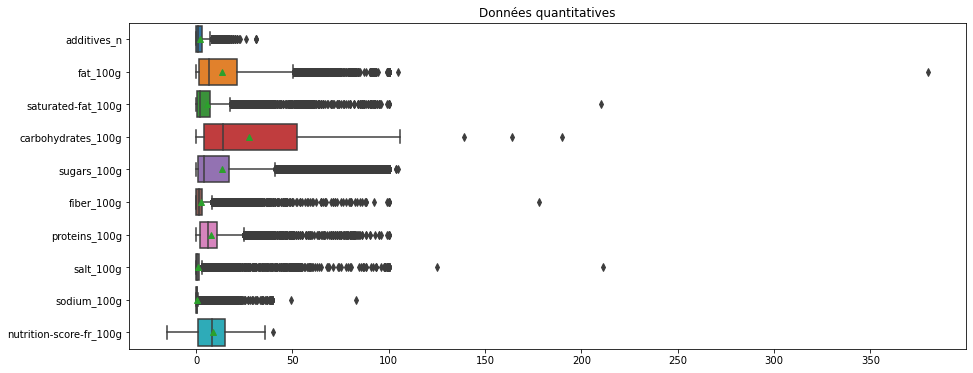

In [39]:
quant_variables = ['additives_n','fat_100g',
                   'saturated-fat_100g',
         'carbohydrates_100g','sugars_100g', 'fiber_100g', 'proteins_100g',
         'salt_100g','sodium_100g',  'nutrition-score-fr_100g']

fig = plt.figure(figsize=(15, 6))
ax = plt.axes()
sns.boxplot(data=Food[quant_variables], orient='h', showfliers=True,showmeans=True).set_title('Données quantitatives');

On observe des valeurs abérantes pour le : \
    - "'fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g', 'fiber_100g', \
        'proteins_100g','salt_100g' >100g\
Le Nutri-score donne des valeurs entre –15 et +40

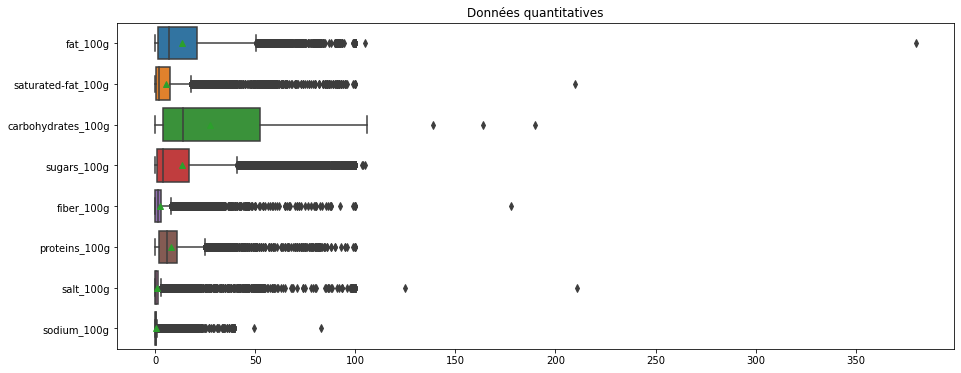

In [40]:
quant_variables = ['fat_100g', 'saturated-fat_100g',
         'carbohydrates_100g','sugars_100g', 'fiber_100g', 'proteins_100g',
         'salt_100g','sodium_100g']

fig = plt.figure(figsize=(15, 6))
ax = plt.axes()
sns.boxplot(data=Food[quant_variables], orient='h', showfliers=True,showmeans=True).set_title('Données quantitatives');

In [41]:
def verif_outliers():
    #Remplace les valeurs >100g et inférieur à 0 g par None
    #retourne  Le Df avec les valeurs incohérentes remplacées par None
    columns = Food.loc[:,['additives_n','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g', \
                          'fiber_100g', 'proteins_100g','salt_100g','sodium_100g']]
    for column in columns :
        Food[column][(Food[column]>100) |   (Food[column]<0)] = None
    return Food

In [42]:
verif_outliers()

/var/folders/ph/zr8mv1g118n6lqtp8j6p0tpw0000gn/T/ipykernel_49881/2975219838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Food[column][(Food[column]>100) |   (Food[column]<0)] = None


,code,url,product_name,brands,countries_fr,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,Ferme t'y R'nao,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,<NA>,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,<NA>,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,Bertrand Lejeune,France,lentilles vertes,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,0000007730009,http://world-fr.openfoodfacts.org/produit/0000...,Biscuits sablés fourrage au cacao,St Michel,France,"Sucre, farine de _Blé_, graisse et huiles végé...",3.0,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),Roussette du Bugey,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.0254,0.01,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",<NA>,France,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,"Sans marque,D.Lambert",France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


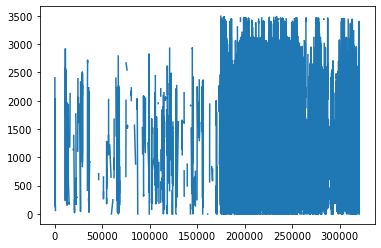

In [43]:
plt.plot(Food["energy_100g"])

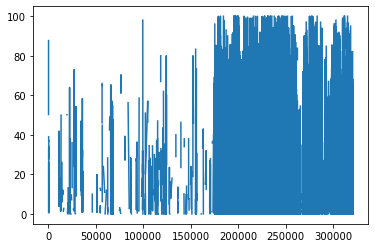

In [44]:
plt.plot(Food["sugars_100g"])

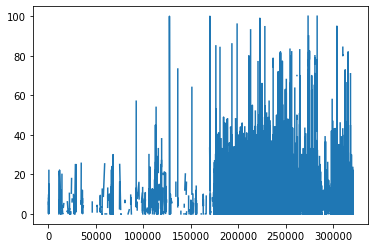

In [45]:
plt.plot(Food["proteins_100g"])

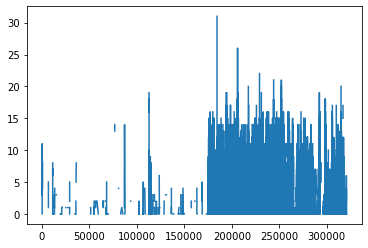

In [46]:
plt.plot(Food["additives_n"])

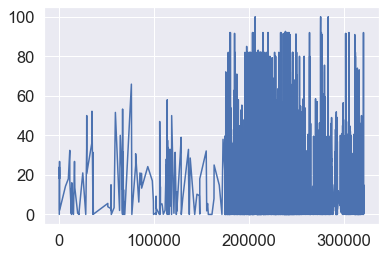

In [69]:
plt.plot(Food["fat_100g"])

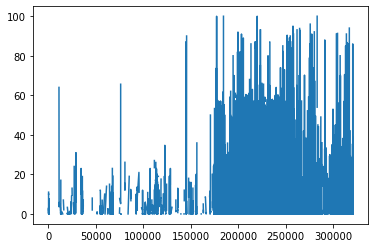

In [48]:
plt.plot(Food["saturated-fat_100g"])

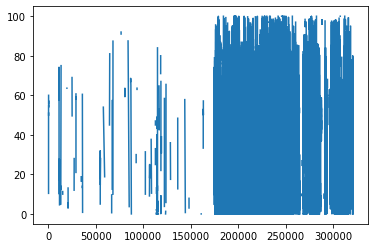

In [49]:
plt.plot(Food["carbohydrates_100g"])

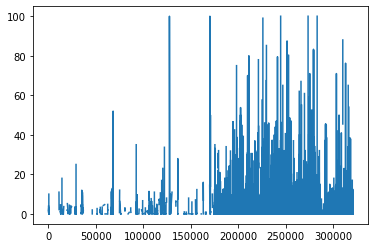

In [50]:
plt.plot(Food["fiber_100g"])

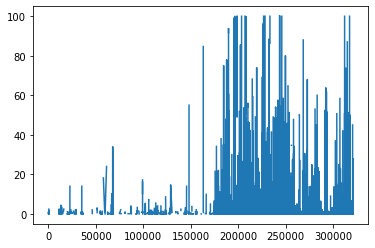

In [51]:
plt.plot(Food["salt_100g"])

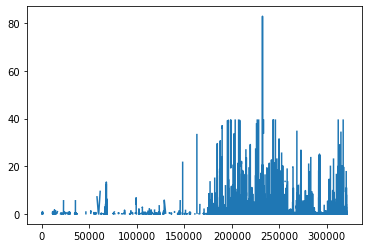

In [52]:
plt.plot(Food["sodium_100g"])

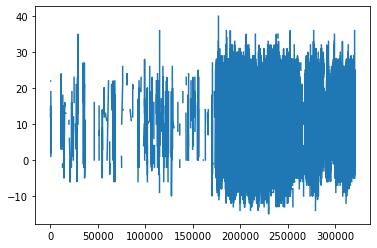

In [53]:
plt.plot(Food["nutrition-score-fr_100g"])

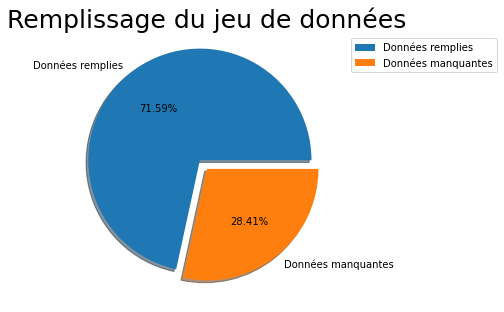

In [54]:
taux_remplissage(Food)

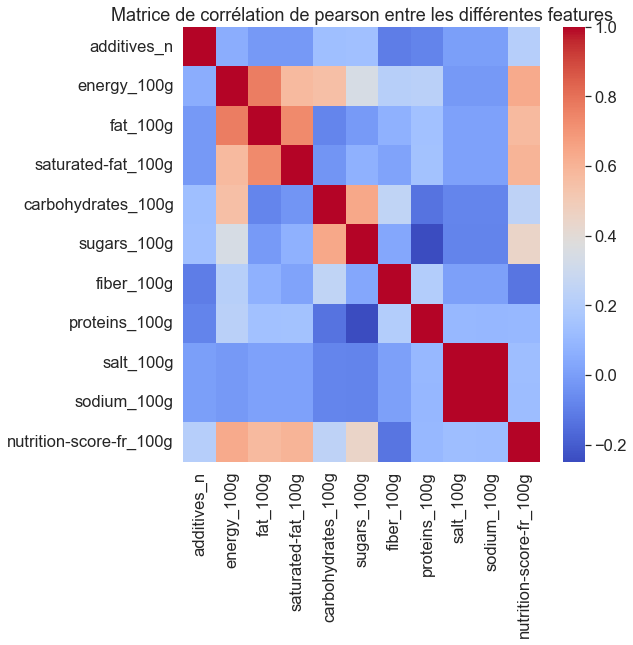

In [55]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson entre les différentes features')

sns.heatmap(Food.corr(), cmap='coolwarm')
plt.show()

In [56]:
Food.corr()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
additives_n,1.000000,0.056341,-0.019321,-0.019136,0.126790,0.133245,-0.104582,-0.086342,0.003723,0.003908,0.211406
energy_100g,0.056341,1.000000,0.769041,0.575182,0.554574,0.342505,0.218469,0.228930,-0.018554,-0.018049,0.633838
fat_100g,-0.019321,0.769041,1.000000,0.736361,-0.080965,-0.011128,0.071853,0.138006,0.013411,0.012915,0.571970
saturated-fat_100g,-0.019136,0.575182,0.736361,1.000000,-0.033080,0.069795,0.014694,0.144098,0.011152,0.010295,0.599091
carbohydrates_100g,0.126790,0.554574,-0.080965,-0.033080,1.000000,0.640544,0.250997,-0.136554,-0.082747,-0.078445,0.239265
sugars_100g,0.133245,0.342505,-0.011128,0.069795,0.640544,1.000000,0.032345,-0.248972,-0.087159,-0.084348,0.444163
fiber_100g,-0.104582,0.218469,0.071853,0.014694,0.250997,0.032345,1.000000,0.200651,0.006307,0.005355,-0.131845
proteins_100g,-0.086342,0.228930,0.138006,0.144098,-0.136554,-0.248972,0.200651,1.000000,0.098233,0.094844,0.098635
salt_100g,0.003723,-0.018554,0.013411,0.011152,-0.082747,-0.087159,0.006307,0.098233,1.000000,1.000000,0.123927
sodium_100g,0.003908,-0.018049,0.012915,0.010295,-0.078445,-0.084348,0.005355,0.094844,1.000000,1.000000,0.121047


In [57]:
def iter_imputer(List):
    Df_iter_imputer = Food
    imp_mean = IterativeImputer(random_state=0)
    imp_mean.fit(Df_iter_imputer[List])
    IterativeImputer(random_state=0)
    X = Df_iter_imputer[List]
    Df_iter_imputer[List] = imp_mean.transform(X)

In [58]:
# limite de corrélation > 0.5
List_energy_fat = Food[["energy_100g","fat_100g"]].columns
List_energy_saturated_fat = Food[["energy_100g","saturated-fat_100g"]].columns
List_energy_carbohydrates = Food[["energy_100g","carbohydrates_100g"]].columns
List_energy_nutrition_score_fr = Food[["energy_100g","nutrition-score-fr_100g"]].columns
List_sugars_carbohydrates = Food[["sugars_100g","carbohydrates_100g"]].columns

List_fat_saturated_fat = Food[["fat_100g","saturated-fat_100g"]].columns
List_fat_nutrition_score_fr = Food[["fat_100g","nutrition-score-fr_100g"]].columns
List_saturated_fat_nutrition_score_fr = Food[["saturated-fat_100g","nutrition-score-fr_100g"]].columns

In [59]:
iter_imputer(List_energy_fat)
iter_imputer(List_energy_saturated_fat)
iter_imputer(List_energy_carbohydrates)
iter_imputer(List_energy_nutrition_score_fr)
iter_imputer(List_sugars_carbohydrates)
iter_imputer(List_fat_saturated_fat)
iter_imputer(List_fat_nutrition_score_fr)
iter_imputer(List_saturated_fat_nutrition_score_fr)

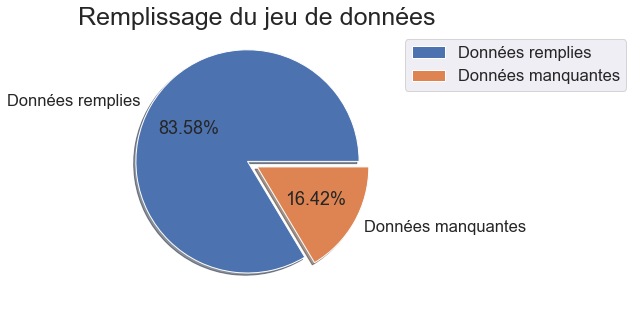

In [60]:
taux_remplissage(Food)

In [61]:
verif_outliers_energy()

/var/folders/ph/zr8mv1g118n6lqtp8j6p0tpw0000gn/T/ipykernel_49881/3260607063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Food[column][(Food[column]>3500) |   (Food[column]<0)] = None


,code,url,product_name,brands,countries_fr,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,Ferme t'y R'nao,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,<NA>,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,<NA>,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,Bertrand Lejeune,France,lentilles vertes,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
184,0000007730009,http://world-fr.openfoodfacts.org/produit/0000...,Biscuits sablés fourrage au cacao,St Michel,France,"Sucre, farine de _Blé_, graisse et huiles végé...",3.0,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),Roussette du Bugey,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,21.000000,0.20000,0.200000,0.500000,0.500000,0.2,0.5,0.0254,0.01,2.000000
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",<NA>,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,"Sans marque,D.Lambert",France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557


In [62]:
verif_outliers()

/var/folders/ph/zr8mv1g118n6lqtp8j6p0tpw0000gn/T/ipykernel_49881/2975219838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Food[column][(Food[column]>100) |   (Food[column]<0)] = None


,code,url,product_name,brands,countries_fr,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,Ferme t'y R'nao,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,<NA>,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,<NA>,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,Bertrand Lejeune,France,lentilles vertes,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
184,0000007730009,http://world-fr.openfoodfacts.org/produit/0000...,Biscuits sablés fourrage au cacao,St Michel,France,"Sucre, farine de _Blé_, graisse et huiles végé...",3.0,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),Roussette du Bugey,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,c,21.000000,0.20000,0.200000,0.500000,0.500000,0.2,0.5,0.0254,0.01,2.000000
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",<NA>,France,<NA>,NaN,<NA>,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,"Sans marque,D.Lambert",France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,<NA>,1107.561157,13.39535,5.364734,27.556262,13.220305,NaN,NaN,NaN,NaN,8.584557


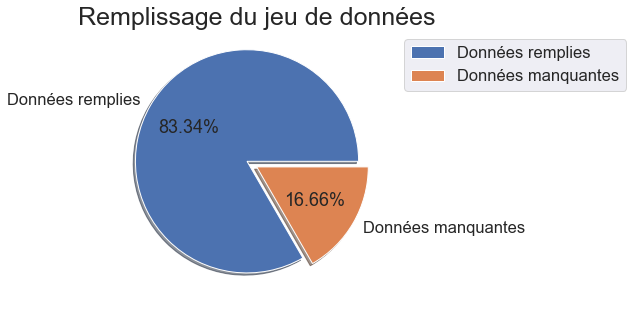

In [63]:
taux_remplissage(Food)

In [64]:
Food = Food.dropna()

,code,url,product_name,brands,countries_fr,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
226,0000040608754,http://world-fr.openfoodfacts.org/produit/0000...,"Pepsi, Nouveau goût !",Pepsi,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",2.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,e,177.0,0.0,0.00,10.40,10.40,0.000,0.000,0.0254,0.010000,13.0
242,000010,http://world-fr.openfoodfacts.org/produit/0000...,Madeleines nature,Bijou,France,"Farine de _blé_, huile de colza, sucre, _oeufs...",5.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,d,1900.0,23.0,2.50,55.00,26.00,1.500,6.000,0.6600,0.259843,12.0
279,000030,http://world-fr.openfoodfacts.org/produit/0000...,Cakes Raisins,Bijou,France,"Farine de _blé_, _œufs_ frais, huile de colza,...",5.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,d,1768.0,19.0,2.50,56.00,28.00,1.800,5.800,0.6500,0.255906,13.0
283,000031,http://world-fr.openfoodfacts.org/produit/0000...,Cakes aux Fruits,Bijou,France,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...",11.0,[ fruits-37-4 -> fr:fruits-37-4 ] [ fruits-...,d,1670.0,15.0,2.00,60.00,34.00,1.500,4.900,0.6000,0.236220,12.0
299,000050,http://world-fr.openfoodfacts.org/produit/0000...,Financiers aux Amandes,Bijou,France,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_...",3.0,[ sucre -> fr:sucre ] [ blanc-d-oeufs-frais...,e,1868.0,23.0,10.00,51.00,39.00,1.700,8.000,0.5500,0.216535,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320652,9556587103869,http://world-fr.openfoodfacts.org/produit/9556...,Mini Paratha,Kawan,France,"Farine de _blé_ (52%), eau, huile de palme, su...",1.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,c,1309.0,15.0,9.00,41.40,5.10,6.500,6.000,0.9000,0.354331,10.0
320668,9577283844672,http://world-fr.openfoodfacts.org/produit/9577...,100% Pur Jus 4 agrumes,Cora,France,"Jus d'orange (dont pulpe 1,6%), jus de clément...",0.0,[ jus-d-orange -> fr:jus-d-orange ] [ jus-d...,c,192.0,0.5,0.00,10.20,9.20,0.600,0.600,0.0300,0.011811,4.0
320681,96068779,http://world-fr.openfoodfacts.org/produit/9606...,Spearmint sans sucres,Fisherman's Friend,France,"Édulcorants : sorbitol, sucralose, acésulfame-...",4.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,c,1017.0,1.3,1.28,95.87,0.12,0.005,0.040,0.0050,0.001969,4.0
320702,96118580,http://world-fr.openfoodfacts.org/produit/9611...,Fisherman's Friend Miel-Citron,Fisherman's Friend,France,"Édulcorants : sorbitols, sucralose, acésulfame...",5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,b,1031.0,1.3,1.28,95.31,0.10,1.470,0.004,0.0010,0.000394,2.0


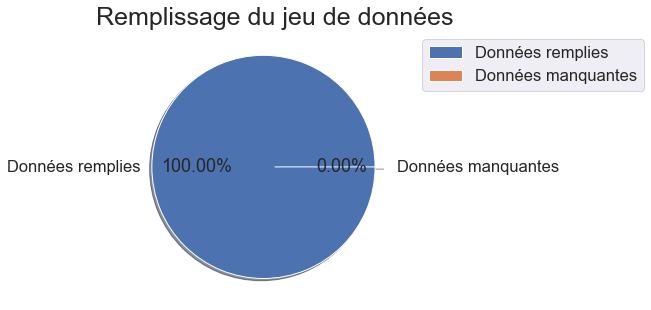

In [65]:
taux_remplissage(Food)

In [66]:
Food.to_csv('Food_pour_analyse.csv',index=False)

In [67]:
#Df_iter_imputer = Food
#imp_mean = IterativeImputer(random_state=0)
#imp_mean.fit(Df_iter_imputer[List_energy_fat])
#IterativeImputer(random_state=0)
#X = Df_iter_imputer[List_energy_fat]
#Df_iter_imputer[List_energy_fat] = imp_mean.transform(X)